# Week 1 - Tasks

- **Data Source:** `yfinance`
- **Assets:** `AAPL`, `MSFT`, `GOOG`, `AMZN`, `TSLA` (and `NVDA` for Task 5)
- **Timeframes:**
  * **Long Term:** `start="2015-01-01", end="2024-01-01"`
  * **Medium Term:** `start="2020-01-01", end="2024-01-01"` (Includes COVID crash)

The goal for this week is to gain familiarity with financial data, analyze common trends, learn standard library functions, and touch upon the underlying theory.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers     = ["AAPL", "MSFT", "AMZN", "GOOG", "TSLA"]
long_data   = pd.DataFrame(yf.download(tickers, auto_adjust=False))
medium_data = pd.DataFrame(yf.download(tickers, start='2020-01-01', end='2024-01-01', auto_adjust=False))

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


## Task 1 - Setup
* Fetch **Long Term** historical data for the 5 assets.
* Extract the `Adjusted Close` values.
    * *Note: Check for missing values or empty rows and handle them (drop or fill).*
* Use `df.describe()` to extract key summary statistics.
* Extract the **Medium Term** data as well for later tasks.

In [45]:
df = long_data['Adj Close'] # pyright: ignore[reportOptionalSubscript]
df = df.dropna(how='all').ffill().bfill()
df.describe()

Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000
mean,81.394710,91.950540,73.063479,154.516908,102.886245
std,55.990879,48.654536,36.298158,99.658478,110.936400
min,20.604076,14.347500,24.377237,34.437172,9.578000
25%,32.814688,44.303625,41.515254,59.182498,16.670500
50%,51.220842,90.691998,59.376663,127.528816,23.160666
75%,139.017632,133.230000,104.133982,244.037380,214.290005
max,196.256561,186.570496,149.587051,377.077820,409.970001


## Task 2 - Basic Trends
* Select **one asset** and using the **Medium Term** data, compute:
    * **Returns:** 1-day, 5-day, and 20-day simple returns.
    * **Log Returns:** 1-day, 5-day, and 20-day log returns.
    * **Volatility:** 5-day, 20-day, and 60-day rolling standard deviation (volatility) of the log returns.
* **Plotting:**
    * Plot the price and the 20-day moving average on one chart.
    * Plot the 1-day log returns on a separate chart.
    * Plot the rolling volatilities on a third chart.
    * *Analysis:* What trends do you observe? Does high volatility correlate with price drops?

* **Bonus (Long Term Data):**
    * Create a scatter plot of `|Daily Return|` vs `Volume`. Is there a relationship?
    * Group returns and volatility by **Month** (e.g., all Januaries, all Februaries) and plot the averages. Is there a "seasonal" effect?

In [46]:
# We will use AMZN data
amzn = medium_data.xs('AMZN', level=1, axis=1)
amzn_prices = amzn['Adj Close'].dropna(how='all').ffill().bfill()
amzn_prices

Date
2020-01-02     94.900497
2020-01-03     93.748497
2020-01-06     95.143997
2020-01-07     95.343002
2020-01-08     94.598503
                 ...    
2023-12-22    153.419998
2023-12-26    153.410004
2023-12-27    153.339996
2023-12-28    153.380005
2023-12-29    151.940002
Name: Adj Close, Length: 1006, dtype: float64

In [47]:
# Computing simple returns
simp_rets = []

for W in [1, 5, 20]:
    simp_rets.append(
        (amzn_prices / amzn_prices.shift(W) - 1).dropna()
    )
    
for i in range(3):
    print(simp_rets[i], end='\n\n\n')

Date
2020-01-03   -0.012139
2020-01-06    0.014886
2020-01-07    0.002092
2020-01-08   -0.007809
2020-01-09    0.004799
                ...   
2023-12-22   -0.002730
2023-12-26   -0.000065
2023-12-27   -0.000456
2023-12-28    0.000261
2023-12-29   -0.009388
Name: Adj Close, Length: 1005, dtype: float64


Date
2020-01-09    0.001602
2020-01-10    0.004368
2020-01-13   -0.006085
2020-01-14   -0.019624
2020-01-15   -0.015830
                ...   
2023-12-22    0.023005
2023-12-26   -0.004284
2023-12-27   -0.002926
2023-12-28    0.008283
2023-12-29   -0.012350
Name: Adj Close, Length: 1001, dtype: float64


Date
2020-01-31    0.058330
2020-02-03    0.068924
2020-02-04    0.077141
2020-02-05    0.069753
2020-02-06    0.083648
                ...   
2023-12-22    0.045523
2023-12-26    0.038449
2023-12-27    0.042916
2023-12-28    0.048250
2023-12-29    0.040044
Name: Adj Close, Length: 986, dtype: float64




In [48]:
# Computing log_returns
log_prices = pd.DataFrame(np.log(amzn_prices))
log_rets = [log_prices.diff(periods=i).dropna() for i in [1, 5, 20]]
for i in range(3):
    print(log_rets[i], end='\n\n\n')

            Adj Close
Date                 
2020-01-03  -0.012213
2020-01-06   0.014776
2020-01-07   0.002089
2020-01-08  -0.007839
2020-01-09   0.004788
...               ...
2023-12-22  -0.002734
2023-12-26  -0.000065
2023-12-27  -0.000456
2023-12-28   0.000261
2023-12-29  -0.009433

[1005 rows x 1 columns]


            Adj Close
Date                 
2020-01-09   0.001600
2020-01-10   0.004359
2020-01-13  -0.006104
2020-01-14  -0.019819
2020-01-15  -0.015957
...               ...
2023-12-22   0.022744
2023-12-26  -0.004293
2023-12-27  -0.002930
2023-12-28   0.008249
2023-12-29  -0.012427

[1001 rows x 1 columns]


            Adj Close
Date                 
2020-01-31   0.056692
2020-02-03   0.066652
2020-02-04   0.074310
2020-02-05   0.067428
2020-02-06   0.080333
...               ...
2023-12-22   0.044517
2023-12-26   0.037728
2023-12-27   0.042021
2023-12-28   0.047122
2023-12-29   0.039263

[986 rows x 1 columns]




In [49]:
# Computing volatility
volatility = []

for W in [5, 20, 60]:
    volatility.append(
        pd.DataFrame(np.log(amzn_prices)).rolling(W).std().dropna()
    )
    
for i in range(3):
    print(volatility[i], end='\n\n\n')

            Adj Close
Date                 
2020-01-08   0.006598
2020-01-09   0.006735
2020-01-10   0.005041
2020-01-13   0.004866
2020-01-14   0.006295
...               ...
2023-12-22   0.005085
2023-12-26   0.004564
2023-12-27   0.004245
2023-12-28   0.001333
2023-12-29   0.004245

[1002 rows x 1 columns]


            Adj Close
Date                 
2020-01-30   0.010561
2020-01-31   0.018324
2020-02-03   0.022956
2020-02-04   0.029294
2020-02-05   0.033525
...               ...
2023-12-22   0.020968
2023-12-26   0.022111
2023-12-27   0.022878
2023-12-28   0.023231
2023-12-29   0.022839

[987 rows x 1 columns]


            Adj Close
Date                 
2020-03-27   0.058974
2020-03-30   0.058966
2020-03-31   0.058840
2020-04-01   0.058829
2020-04-02   0.058809
...               ...
2023-12-22   0.069180
2023-12-26   0.069395
2023-12-27   0.069831
2023-12-28   0.069273
2023-12-29   0.068835

[947 rows x 1 columns]




Text(0, 0.5, 'Current Price')

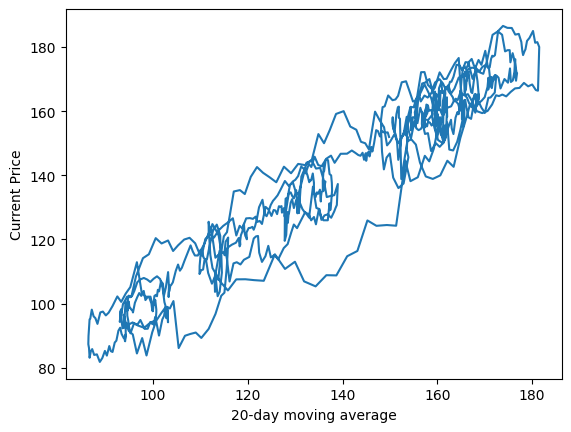

In [50]:
# Plotting
import matplotlib.pyplot as plt

amzn_avg = amzn_prices.rolling(20).mean()
plt.plot(amzn_avg, amzn_prices)
plt.xlabel('20-day moving average')
plt.ylabel('Current Price')


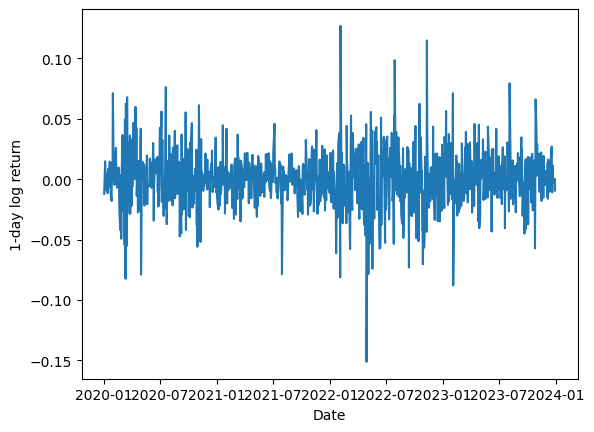

In [51]:
plt.plot(log_rets[0])
plt.xlabel('Date')
plt.ylabel('1-day log return')
plt.show()

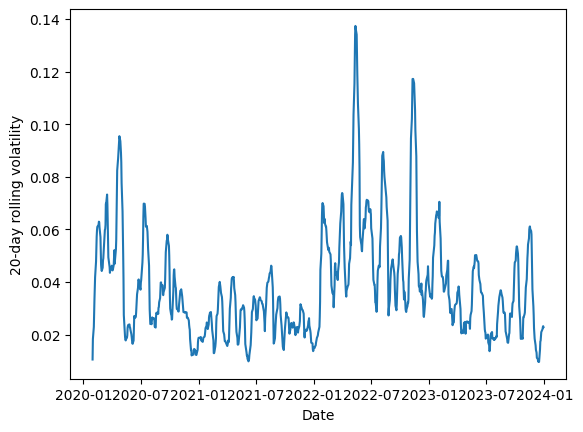

In [52]:
plt.plot(volatility[1])
plt.xlabel('Date')
plt.ylabel('20-day rolling volatility')
plt.show()

The peaks in volitality graph seem to occur simultaneously with dips in the log returns graph. A drop in 1-day log returns reflects a drop in price. Visually, there appears to be some correlation between the two. It might be explained by the fact that uncertainity and fear usually breed price drops in which case volatality is expected to be high.

In [53]:
def correl(x, y):
    s = min(len(x), len(y))
    x = x[:s]
    y = y[:s]
    return np.corrcoef(x, y)

x = np.array(log_rets[0]).flatten()
y = np.array(volatility[1]).flatten()
print(correl(x, y))

[[ 1.         -0.03988063]
 [-0.03988063  1.        ]]


However, actual value of the correlation coefficient is quite low. Perhaps, we should use a moving average?

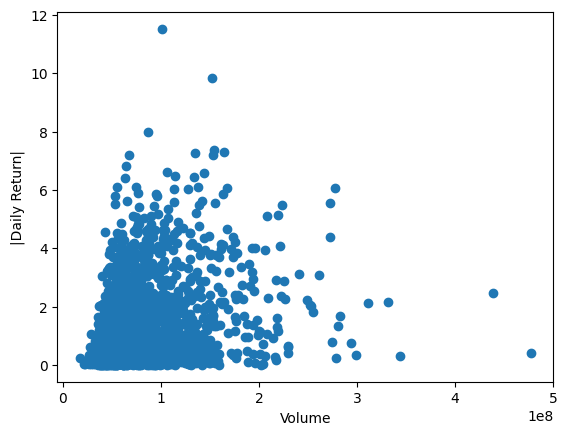

In [54]:
amzn = long_data.xs('AMZN', level=1, axis=1)
daily_ret = amzn['Close'] - amzn['Open']
volume    = amzn['Volume']
plt.scatter(volume, np.abs(daily_ret))
plt.xlabel('Volume')
plt.ylabel('|Daily Return|')
plt.show()

In [55]:
# monthly_amzn = {
#     month: group
#     for month, group in amzn.groupby(amzn.index.month)
# }
for i in range(1, 13):
    ...
    # plt.figure()
    # plt.plot()

## Task 3 - Stationarity
* Select **one asset** (Long Term).
* Compute the **Rolling Mean** and **Rolling Standard Deviation** of log returns with window sizes `20, 60, 120`.
* Plot them and visually inspect.
    * Does the mean stay constant? (Stationary mean)
    * Does the variance stay constant? (Stationary variance)
* Run an **Augmented Dickey-Fuller (ADF) Test** on the log return series.
    * Library: `from statsmodels.tsa.stattools import adfuller`
    * *Goal:* Interpret the p-value. The Null Hypothesis ($H_0$) is that the series is non-stationary (has a unit root). If p-value < 0.05, we reject $H_0$.
    * For learning about hypothesis testing and p-value you can refer to CS215 slides or other standard resources mentioned in READMEs.

In [56]:
goog = long_data.xs('GOOG', level=1, axis=1).dropna(how='all').ffill().bfill()
goog = pd.DataFrame(np.log(goog['Adj Close'])).diff().dropna()

gr_data = {}
for W in [20, 60, 120]:
    gr_data[W] = (
        goog.rolling(W).mean().dropna(),
        goog.rolling(W).var().dropna()
    )
    
    

In [57]:
gr_data[20]

(            Adj Close
 Date                 
 2015-02-02   0.000348
 2015-02-03   0.001474
 2015-02-04   0.002030
 2015-02-05   0.002575
 2015-02-06   0.002740
 ...               ...
 2023-12-22   0.001602
 2023-12-26   0.001698
 2023-12-27   0.001007
 2023-12-28   0.001758
 2023-12-29   0.002551
 
 [2244 rows x 1 columns],
             Adj Close
 Date                 
 2015-02-02   0.000350
 2015-02-03   0.000324
 2015-02-04   0.000301
 2015-02-05   0.000303
 2015-02-06   0.000304
 ...               ...
 2023-12-22   0.000289
 2023-12-26   0.000289
 2023-12-27   0.000295
 2023-12-28   0.000279
 2023-12-29   0.000258
 
 [2244 rows x 1 columns])

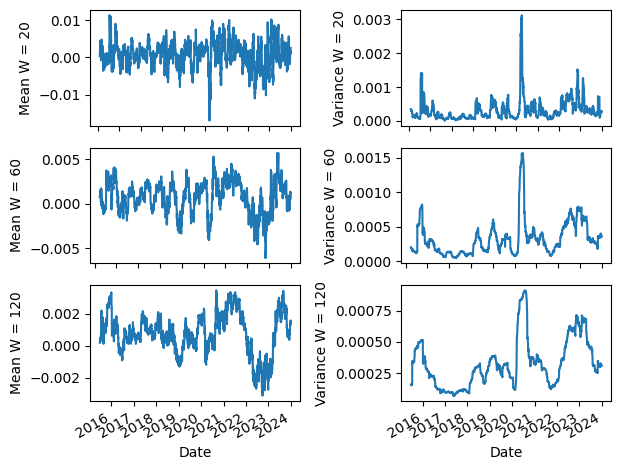

In [58]:
fig, ax = plt.subplots(nrows=3, ncols=2)

for i, W in enumerate([20, 60, 120]):
    mean_data, var_data = gr_data[W]
    ax[i, 0].plot(mean_data)
    ax[i, 0].set_ylabel(f'Mean {W = }')
    ax[i, 0].set_xlabel('Date')
    ax[i, 1].plot(var_data)
    ax[i, 1].set_ylabel(f'Variance {W = }')
    ax[i, 1].set_xlabel('Date')

fig.autofmt_xdate()
fig.tight_layout()


Visually, the mean is non-stationary but the variance looks somewhat stationary in comparision to the mean.

In [59]:
from statsmodels.tsa.stattools import adfuller

THRESHOLD = 0.05

for W in [20, 60, 120]:
    mean_data, var_data = gr_data[W]
    
    p_val = adfuller(mean_data)[1]
    if p_val < THRESHOLD:
        print(f'Mean is stationary for {W = }')
    else:
        print(f'Mean is non-stationary for {W = }')
    
    p_val = adfuller(var_data)[1]
    if p_val < THRESHOLD:
        print(f'Variance is stationary for {W = }')
    else:
        print(f'Variance is non-stationary for {W = }')

Mean is stationary for W = 20
Variance is stationary for W = 20
Mean is stationary for W = 60
Variance is stationary for W = 60
Mean is stationary for W = 120
Variance is non-stationary for W = 120


## Task 4 - Volatility Regimes
We try to study the trend in volatility more deeply. From the ACF/PACF plot we know that volatility tends to cluster that is the market is either in a high volatility state (greater daily fluctuations) or low volatility state (stable prices, quiet markets).

Formally we can treat volatility as a *conditional standard deviation of returns*, conditioned on the history observed so far. We *cannot* predict *true* volatility for a given day based on the single return value, hence we try to estimate it using the past information. For this we look at two indicators of volatility:

1.  **Rolling Window Volatility:** Simple Moving Average (SMA) of standard deviation.
2.  **EWMA Volatility:** Exponentially Weighted Moving Average. This gives more weight to recent events. It is given by $\sigma_t^2 = (1-\lambda)r_t^2 + \lambda \sigma_{t-1}^2$.

**Steps:**
* Pick an asset and use data covering the **Feb-Mar 2020 COVID crash**.
* Compute two volatility estimates on the Log Returns:
    1.  **Rolling 20-day Volatility:** Standard deviation over a 20-day window.
    2.  **EWMA Volatility (RiskMetrics):** Use a decay factor $\lambda = 0.94$.
        * *Hint:* In pandas `df.ewm()`, the parameter `alpha` corresponds to $1 - \lambda$. So, use `alpha=0.06`.
* **Analysis:**
    * Plot both estimates on the same chart.
    * Which is smoother?
    * Which estimator reacts faster to the sudden crash in March 2020?
    * Which one would you prefer for risk management?
* **Regime Detection:** Compute the 60th percentile of your EWMA volatility series. Shade the regions on the plot where volatility exceeds this level.

* **Bonus:** A good volatility model "standardizes" the returns well. Calculate $z_t = r_t / \hat{\sigma}_t$. If the model is good, $z_t$ should have $Var \approx 1$. Check the variance of $z_t$ and plot its histogram.

In [60]:
tsla = pd.DataFrame(yf.download(["TSLA"], start="2020-02-01", end="2020-03-31", auto_adjust=False))
tsla = tsla.xs('TSLA', level=1, axis=1).dropna(how='all').ffill().bfill()
tsla

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-02-03,52.000000,52.000000,52.409332,44.901333,44.912666,705975000
2020-02-04,59.137333,59.137333,64.599335,55.591999,58.863998,914082000
2020-02-05,48.980000,48.980000,56.398666,46.940666,54.883999,726357000
2020-02-06,49.930668,49.930668,53.055332,45.799999,46.661331,598212000
2020-02-07,49.871334,49.871334,51.316666,48.666668,48.703335,255952500
2020-02-10,51.418667,51.418667,54.666000,50.160000,53.333332,370338000
2020-02-11,51.625332,51.625332,52.234001,50.533333,51.252666,175462500
2020-02-12,51.152668,51.152668,52.650002,50.891335,51.858002,180337500
2020-02-13,53.599998,53.599998,54.533333,49.000000,49.456001,394339500


In [61]:
LAMBDA = 0.94
price_tsla = tsla['Adj Close']
log_rets = np.log(price_tsla).diff() # pyright: ignore[reportAttributeAccessIssue]
tr_vol = log_rets.rolling(20).std().dropna()
tr_ewm = (log_rets**2).ewm(alpha=1-LAMBDA).mean().pipe(np.sqrt).dropna()
tr_ewm


Date
2020-02-04    0.128619
2020-02-05    0.162239
2020-02-06    0.130883
2020-02-07    0.111548
2020-02-10    0.099236
2020-02-11    0.089138
2020-02-12    0.081264
2020-02-13    0.076972
2020-02-14    0.071384
2020-02-18    0.071259
2020-02-19    0.070697
2020-02-20    0.066865
2020-02-21    0.063133
2020-02-24    0.064772
2020-02-25    0.062848
2020-02-26    0.060341
2020-02-27    0.070988
2020-02-28    0.067919
2020-03-02    0.072188
2020-03-03    0.069074
2020-03-04    0.066181
2020-03-05    0.064180
2020-03-06    0.062147
2020-03-09    0.072202
2020-03-10    0.071319
2020-03-11    0.068756
2020-03-12    0.074196
2020-03-13    0.071763
2020-03-16    0.088425
2020-03-17    0.085704
2020-03-18    0.094745
2020-03-19    0.101661
2020-03-20    0.098094
2020-03-23    0.094772
2020-03-24    0.099575
2020-03-25    0.097662
2020-03-26    0.094498
2020-03-27    0.091565
2020-03-30    0.088712
Name: Adj Close, dtype: float64

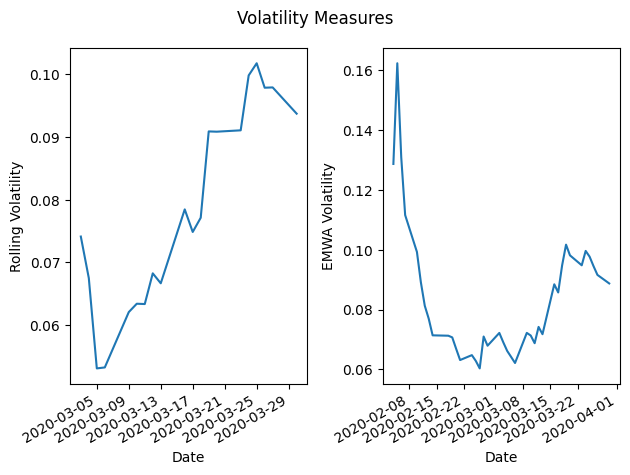

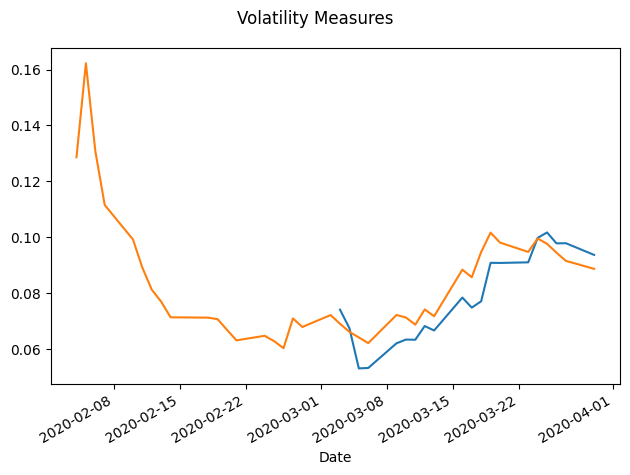

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.suptitle('Volatility Measures')
ax[0].plot(tr_vol)
ax[0].set_ylabel('Rolling Volatility')
ax[0].set_xlabel('Date')
ax[1].plot(tr_ewm)
ax[1].set_ylabel('EMWA Volatility')
ax[1].set_xlabel('Date')

fig.autofmt_xdate()
fig.tight_layout()

fig, ax = plt.subplots(nrows=1, ncols=1)

fig.suptitle('Volatility Measures')
ax.plot(tr_vol)
ax.plot(tr_ewm)
ax.set_xlabel('Date')

fig.autofmt_xdate()
fig.tight_layout()

We can see that EMWA curve is more stable over time and has a faster reaction time in comparision to Rolling Volatility. The latter has less number of small scale fluctuations and more large scale non-smoothness. There also appears to be some boundary effect in the calculated data so the beginning portions of both the plots are not trustworthy.

It appears that EMWA has a better response to risk and also gives more weightage to current events in comparision to RV, so it is expected that it is better suited for risk managament.

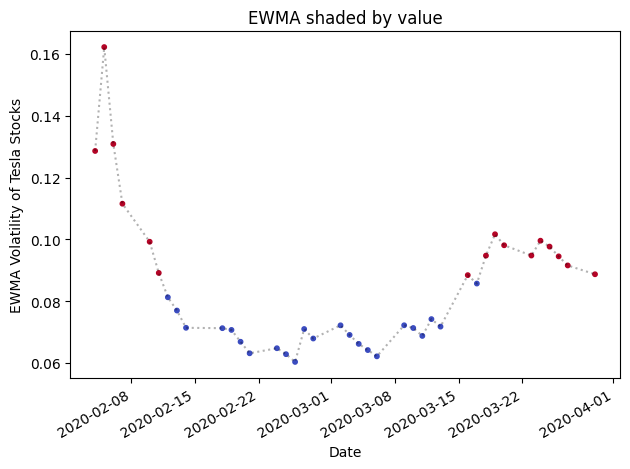

In [63]:
cutoff = tr_ewm.quantile(q=0.6)  # pyright: ignore[reportAttributeAccessIssue]

plt.plot(tr_ewm, color='black', alpha=0.3, linestyle=':')   # pyright: ignore[reportArgumentType] # true continuity
plt.scatter(tr_ewm.index, tr_ewm,
            c=(tr_ewm >= cutoff), # pyright: ignore[reportOperatorIssue]
            cmap='coolwarm',
            s=10)

plt.xlabel('Date')
plt.ylabel('EWMA Volatility of Tesla Stocks')
plt.title('EWMA shaded by value')

plt.gcf().autofmt_xdate()
plt.autoscale()
plt.tight_layout()


z = array([-1.46518646e+00,  1.18487843e-01, -9.08466543e-03,  2.73917538e-01,
        4.04209032e-02, -1.03185889e-01,  5.75091253e-01, -6.43090252e-02,
        9.86514058e-01,  9.33145956e-01, -2.80440024e-01,  2.64152290e-02,
       -1.22793468e+00, -6.40437113e-01, -4.25549803e-01, -2.27263367e+00,
       -2.30291904e-01,  1.57918699e+00,  3.51637617e-02,  7.72763231e-02,
       -5.11770676e-01, -4.59606127e-01, -2.34708988e+00,  8.25286227e-01,
       -2.43276198e-01, -1.79611198e+00, -3.39162240e-01, -2.86389274e+00,
       -3.84295040e-01, -2.03915746e+00,  1.78157306e+00, -2.53003663e-03,
        1.59928679e-01,  1.59167614e+00,  6.59012080e-01, -2.12774772e-01,
       -2.80172376e-01, -2.62811159e-01])
np.var(z) = np.float64(1.084693185528643)


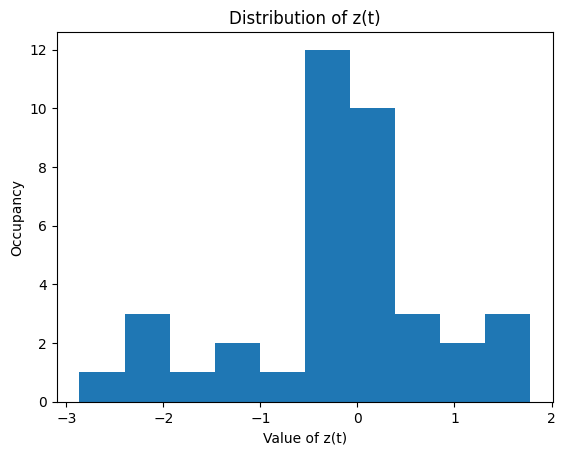

In [64]:
daily_rets = np.diff(np.log(price_tsla))
volatility = np.array(tr_ewm)
z = daily_rets[1:] / volatility[:-1]

print(f'{z = }')
print(f'{np.var(z) = }')
plt.hist(z)
plt.xlabel('Value of z(t)')
plt.ylabel('Occupancy')
plt.title('Distribution of z(t)')
plt.show()

## Task 5 - Time Horizons and the "Normal" Illusion
Short-term markets are noisy and dangerous (fat tails), while long-term data looks smoother. We can prove this statistically using **Skew** and **Kurtosis**.

**Theory:**
* **Skewness:** Measures asymmetry. (Negative skew = frequent small gains, few extreme losses).
* **Kurtosis:** Measures "tailedness". (High kurtosis = frequent extreme events/crashes).
* **Normal Distribution:** Skew $\approx 0$, Kurtosis $\approx 3$ (or Excess Kurtosis $\approx 0$).

**Steps:**
1.  Take your **Long Term** data for one asset (e.g., NVDA or TSLA).
2.  Resample the prices to get **Weekly** and **Monthly** closes.
    * Use `df['Adj Close'].resample('W').last()` and `...resample('M').last()`.
3.  Compute Log Returns for all three series: Daily, Weekly, Monthly.
4.  **The Test:**
    * Calculate **Skew** and **Kurtosis** for each of the three return series.
    * *Question:* How do these values change as the time horizon increases? Do they get closer to 0 and 3?
5.  **Visualization:**
    * Plot the **Histograms** of the Daily returns vs. Monthly returns on the same plot.
    * *Tip:* You will need to standardize them (subtract mean, divide by std dev) to overlay them meaningfully.
    * *Observation:* Look at the tails. Which one has "fatter" tails (more extreme outliers)?

**Key Takeaway:**## Task 3 - Stationarity
* Select **one asset** (Long Term).
* Compute the **Rolling Mean** and **Rolling Standard Deviation** of log returns with window sizes `20, 60, 120`.
* Plot them and visually inspect.
    * Does the mean stay constant? (Stationary mean)
    * Does the variance stay constant? (Stationary variance)
* Run an **Augmented Dickey-Fuller (ADF) Test** on the log return series.
    * Library: `from statsmodels.tsa.stattools import adfuller`
    * *Goal:* Interpret the p-value. The Null Hypothesis ($H_0$) is that the series is non-stationary (has a unit root). If p-value < 0.05, we reject $H_0$.
    * For learning about hypothesis testing and p-value you can refer to CS215 slides or other standard resources mentioned in READMEs.

Daily returns often violate the "Normal Distribution" assumption used in many financial models. Long-term returns fit it better. This is called *Aggregational Gaussianity*.

**Bonus:** This is a direct application of a simple yet well-known result in asymptotic statistics. Can you find out what it is and state how it explains this observation?

In [65]:
msft = long_data.xs('MSFT', level=1, axis=1)['Adj Close']
weekly = msft.resample('W').last()
monthly = msft.resample('ME').last()
# [*msft.resample('W')]

In [66]:
from scipy.stats import (skew, kurtosis)

ret_daily   = np.diff(np.log(msft))
ret_weekly  = np.diff(np.log(weekly))
ret_monthly = np.diff(np.log(monthly))
skew_list = [skew(ret_daily), skew(ret_weekly), skew(ret_monthly)]
kurt_list = [kurtosis(ret_daily), kurtosis(ret_weekly), kurtosis(ret_monthly)]
print(f"""
      Daily   : {skew_list[0]:>9.6f} and {3 + kurt_list[0]:>10.6f}
      Weekly  : {skew_list[1]:>9.6f} and {3 + kurt_list[1]:>10.6f}
      Monthly : {skew_list[2]:>9.6f} and {3 + kurt_list[2]:>10.6f}
      """)


      Daily   : -0.148983 and  10.982337
      Weekly  : -0.227260 and   5.765318
      Monthly :  0.070670 and   2.880344
      


Indeed, we find that they get closer to 0 and 3. We have added 3 in kurtosis about because `scipy.stats` by default returns the _excess kurtosis_.

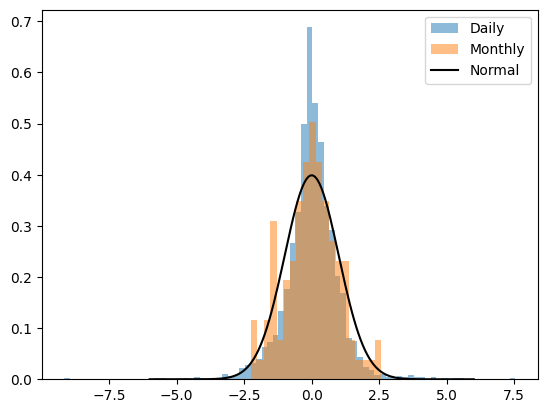

In [67]:
from scipy.stats import norm as normal

std_ret_daily   = (ret_daily   - np.mean(ret_daily))   / np.std(ret_daily)
std_ret_monthly = (ret_monthly - np.mean(ret_monthly)) / np.std(ret_monthly)

x = np.linspace(-6, 6, 150)
plt.hist(std_ret_daily,   bins=80, density=True, label='Daily', alpha=0.5)
plt.hist(std_ret_monthly, bins=20, density=True, label='Monthly', alpha=0.5)
plt.plot(x, normal.pdf(x, 0, 1), 'k-', label='Normal')
plt.legend()
plt.show()

# std_ret_weekly  = (ret_weekly  - np.mean(ret_weekly))  / np.std(ret_weekly)
# plt.hist(std_ret_weekly,  bins=len(std_ret_weekly)  // 5, density=True)


The daily distribution has heavier tails compared to the monthly. Notice that we have used the positional argument `density = True` to offset the result of more number of points in the histograms.

The return is a random variable we are averaging it daily or monthly. The Central Limit Theorem states that the sum of a large number of random variables tends to a Gaussian. Hence, monthly returns, which are a sum of returns over 30 daily returns (due to definition of return and properties of logarithm), more closely match the normal distribution.

## Task 6 - Smart investing
Calculate how many **RTX 4090s** (approx. price $1,600$) you could afford *today* if you had invested **$1,000** in NVIDIA on the day you were born.

In [68]:
nvda = pd.DataFrame(yf.download(tickers=["NVDA"], start="2006-01-01", end="2025-12-12", auto_adjust=False))
nvda = nvda['Adj Close']['NVDA']
RTX_4090_PRICE = 1600
INVESTMENT = 1000
number_of_rtx = (nvda.iloc[-1] / nvda.iloc[0]) * INVESTMENT / RTX_4090_PRICE
print(int(np.floor(number_of_rtx)))


[*********************100%***********************]  1 of 1 completed

387
